In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Real estate.csv",
    sep=",")

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [127]:
df.shape

(414, 8)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [129]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [130]:
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [133]:
def mystery_data():
    coeficients = model.coef_[1:]
    
    for i in range (len(coeficients)):
        print(f"Coefficient of X{i+1} is {coeficients[i]}")


mystery_data()

Coefficient of X1 is 5.859782757992876
Coefficient of X2 is -0.23951636691013223
Coefficient of X3 is -0.005229513348282033
Coefficient of X4 is 1.0649332970111196
Coefficient of X5 is 236.12817590670232
Coefficient of X6 is -54.468707973844076


# 2

In [134]:
df = pd.read_csv("drive_time_sedans.csv",
    sep=",")

df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
2,TRAIN,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED,GEO,FL,GEO.METRO
3,TRAIN,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
4,TRAIN,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE


In [135]:
df.shape

(17506, 13)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17506 entries, 0 to 17505
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           17506 non-null  object
 1   total.cost         17506 non-null  int64 
 2   lot.sale.days      17506 non-null  int64 
 3   overage            17506 non-null  object
 4   mileage            17506 non-null  int64 
 5   vehicle.type       17506 non-null  object
 6   domestic.import    17506 non-null  object
 7   vehicle.age        17506 non-null  int64 
 8   vehicle.age.group  17506 non-null  object
 9   color.set          17506 non-null  object
 10  makex              17506 non-null  object
 11  state              17506 non-null  object
 12  make.model         17506 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.7+ MB


In [137]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,17506.000000,17506.000000,17506.000000,17506.000000
mean,4894.974009,46.819148,76950.447161,5.441049
std,934.798660,52.750454,16978.582173,1.751119
min,1375.000000,0.000000,82.000000,1.000000
25%,4300.000000,7.000000,67242.250000,4.000000
50%,4852.000000,24.000000,77961.000000,5.000000
75%,5444.000000,74.000000,89089.750000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [138]:
df.nunique()

data.set                 3
total.cost            4070
lot.sale.days          287
overage                  2
mileage              15069
vehicle.type             5
domestic.import          2
vehicle.age             12
vehicle.age.group        5
color.set                8
makex                   20
state                    8
make.model             110
dtype: int64

In [139]:
# sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

df = df.drop(['vehicle.age.group', 'color.set', 'make.model'], axis = 1)

df["overage"] = df["overage"].map({"NO": 0, "YES": 1})
df["domestic.import"] = df["domestic.import"].map({"Domestic": 0, "Import": 1})

df = pd.get_dummies(df)

df.head()

,total.cost,lot.sale.days,overage,mileage,domestic.import,vehicle.age,data.set_TEST,data.set_TRAIN,data.set_VALIDATE,vehicle.type_ECONOMY,...,makex_PONTIAC,makex_TOYOTA,state_AZ,state_CA,state_FL,state_GA,state_NM,state_NV,state_TX,state_VA
0,4037,135,1,67341,0,8,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4662,18,0,69384,1,4,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4459,65,0,58239,1,4,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4279,1,0,58999,1,3,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,4472,37,0,47234,0,6,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


/home/ja/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional

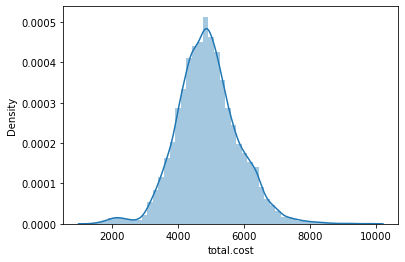

In [147]:
sns.distplot(df["total.cost"]) #check if gaussian

In [140]:
train = df[df['data.set_TRAIN'] == 1].drop(
    ["data.set_TRAIN", "data.set_TEST", "data.set_VALIDATE"], axis=1)
test = df[df['data.set_TEST'] == 1].drop(
    ["data.set_TRAIN", "data.set_TEST", "data.set_VALIDATE"], axis=1)

X_train = train.drop('total.cost', axis=1)
y_train = train['total.cost']

X_test = test.drop('total.cost', axis=1)
y_test = test['total.cost']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8753, 38) (4376, 38) (8753,) (4376,)


In [141]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [142]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,573.104842
MSE,579394.789014
RMSE,761.179866


Text(0, 0.5, 'Y-Pred')

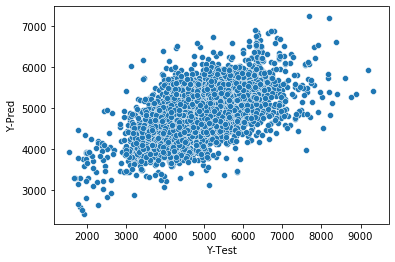

In [143]:
test_residuals=y_test-y_pred
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

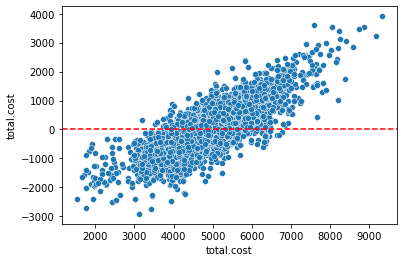

In [144]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


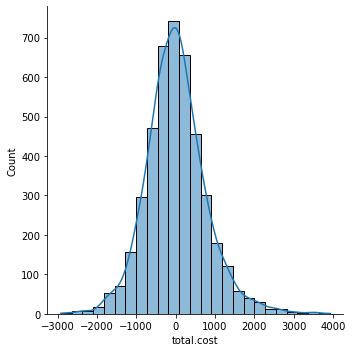

In [145]:
sns.displot(test_residuals, bins=25, kde=True)